In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("concrete_data.csv")
df.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
X = df.drop(columns=['Strength'], axis=1)
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.6275531792314848

In [8]:
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

np.float64(0.4609940491662864)

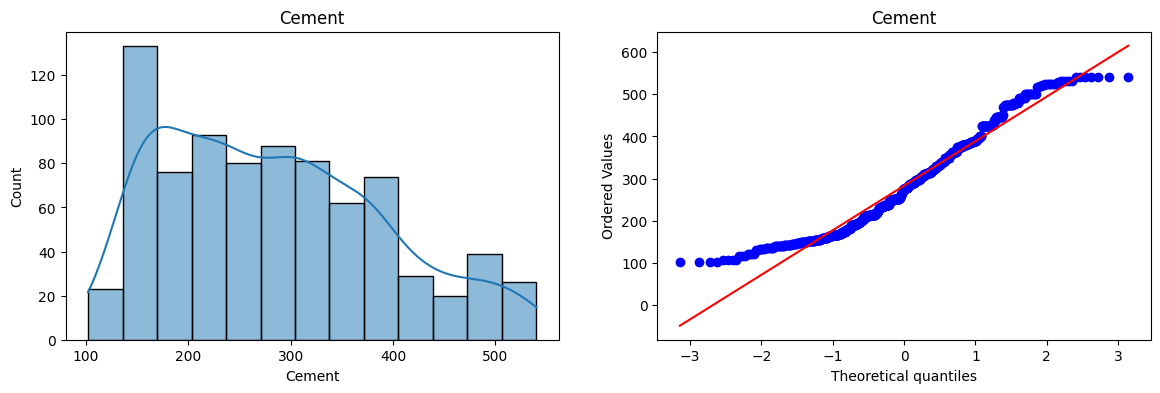

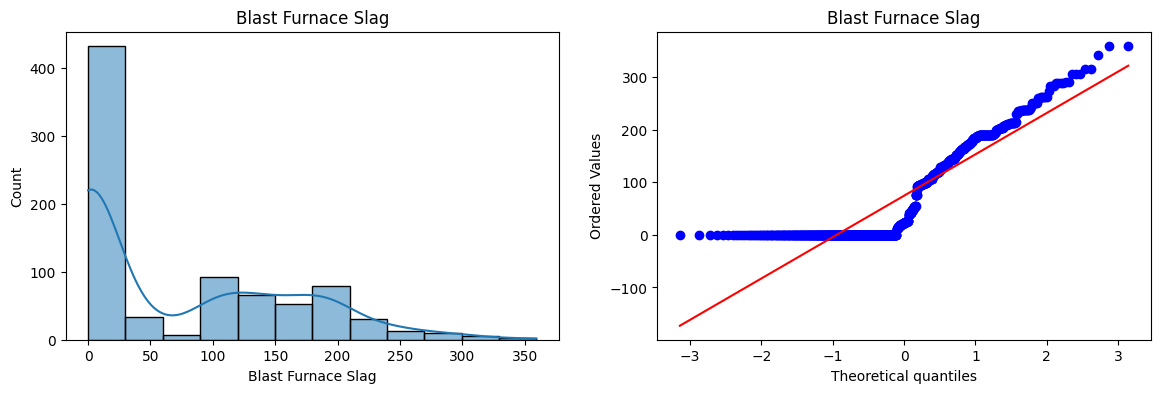

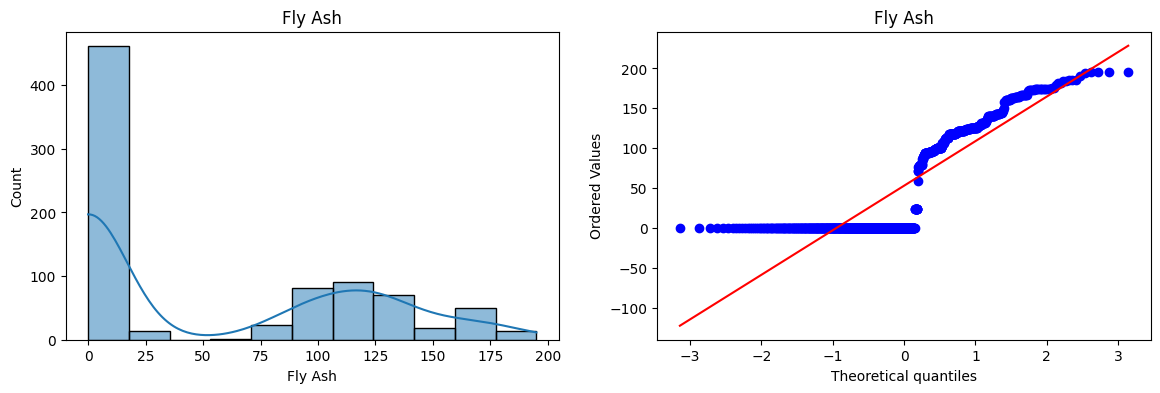

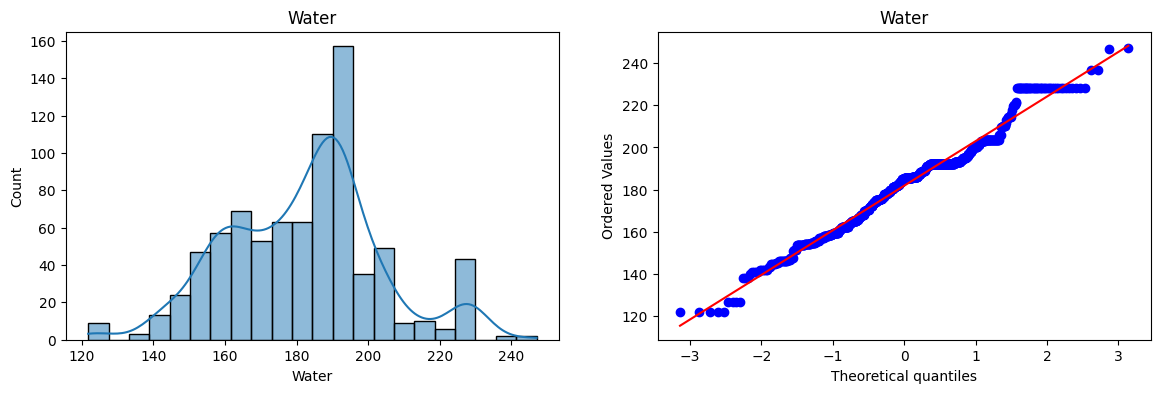

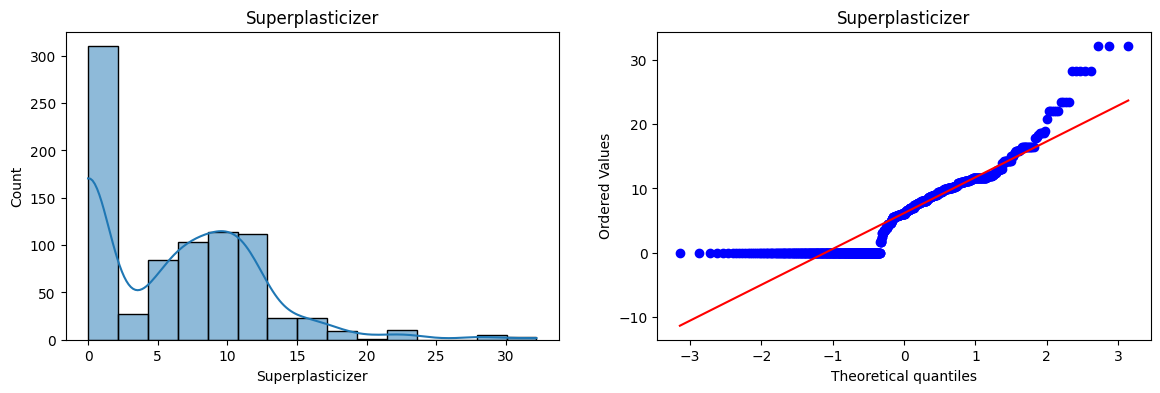

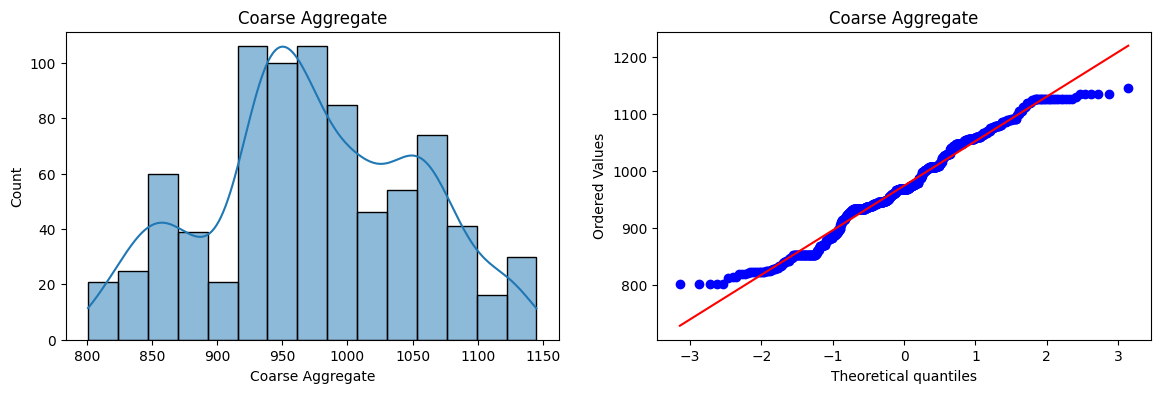

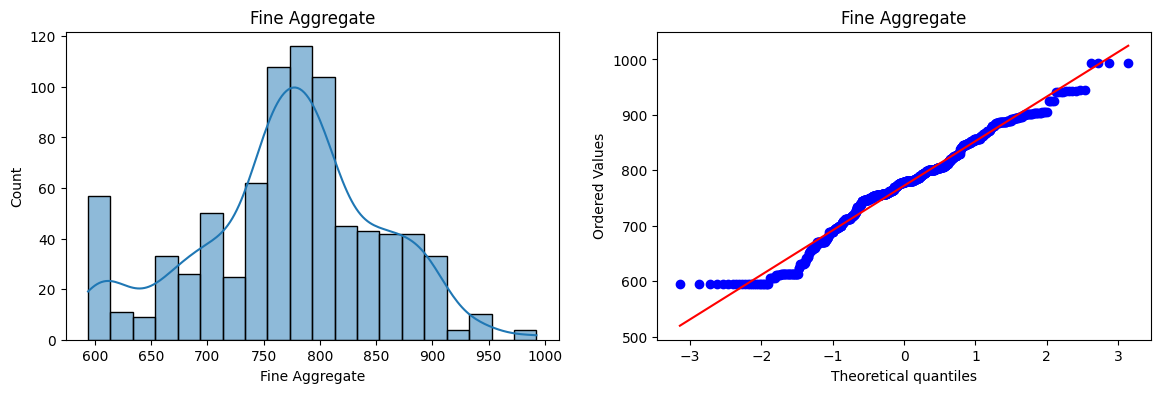

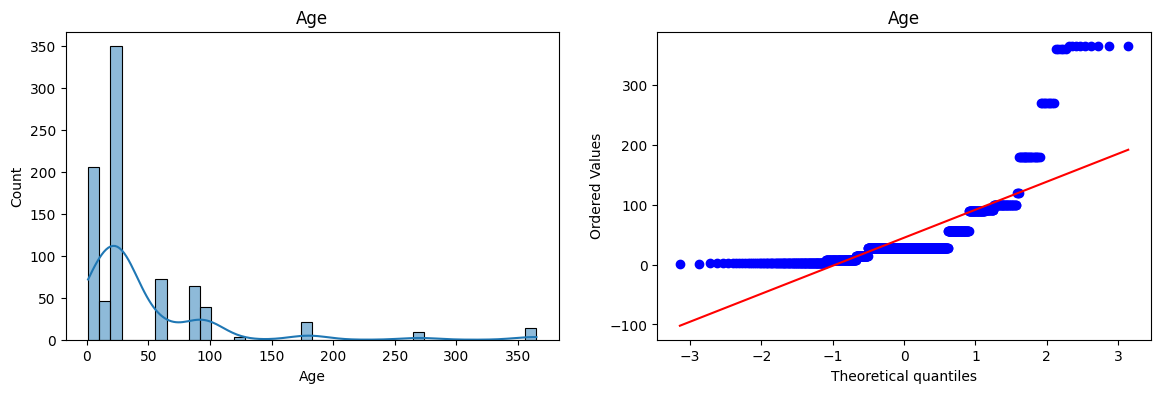

In [9]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)
    plt.show()

### Box-Cox Transformation

In [10]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.00001)

pd.DataFrame({'cols': X_train.columns, 'box-cox-lambdas': pt.lambdas_})

,cols,box-cox-lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [11]:
lr = LinearRegression()

lr.fit(X_train_transformed, y_train)

y_pred = lr.predict(X_test_transformed)

r2_score(y_test, y_pred)

0.8079756386041388

In [12]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

np.float64(0.6658537935430977)

In [13]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

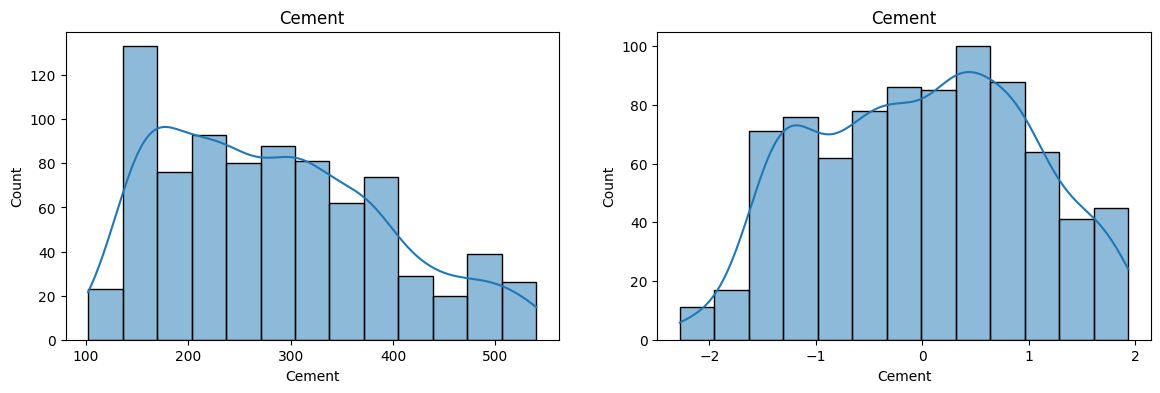

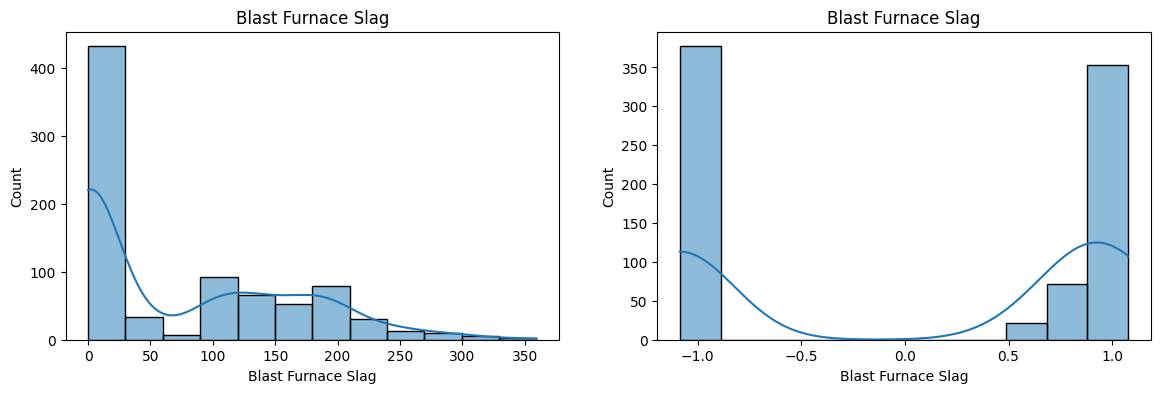

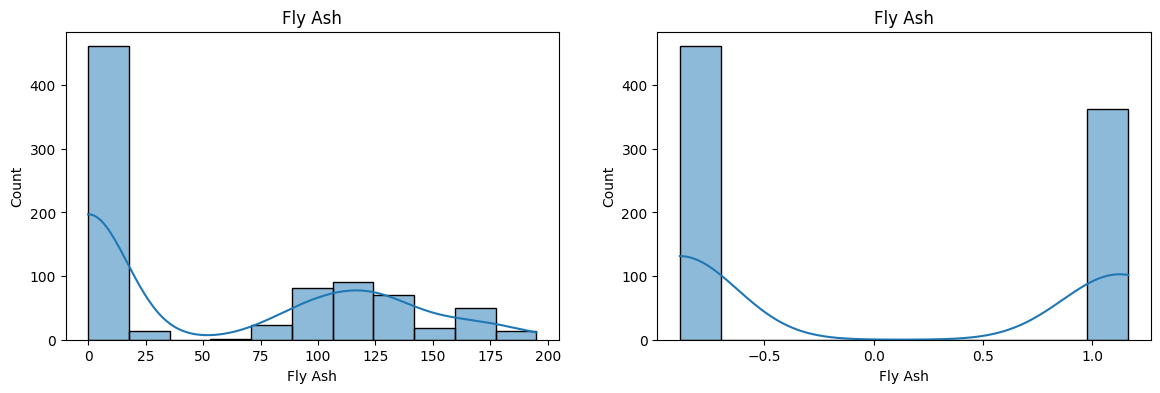

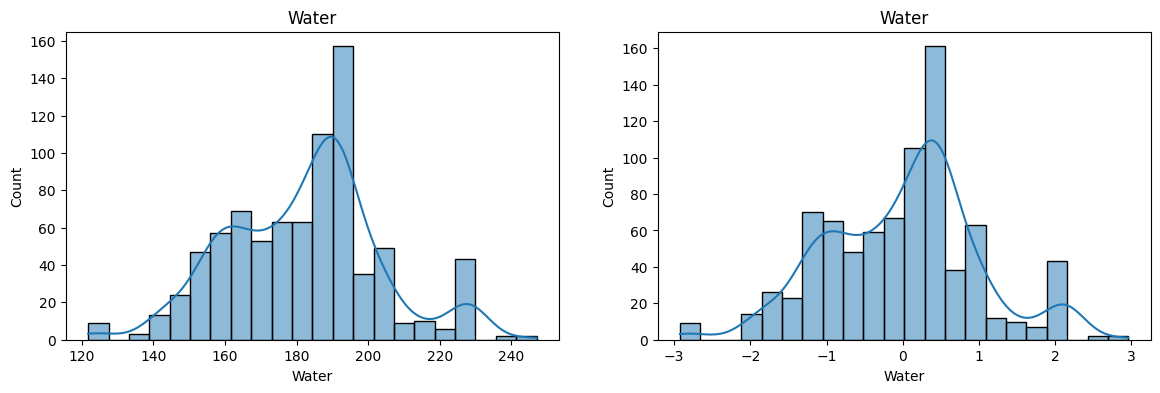

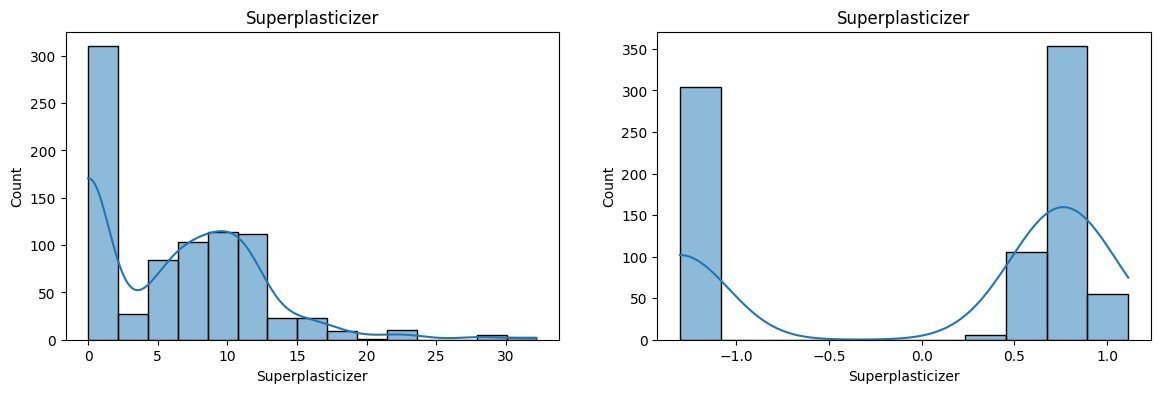

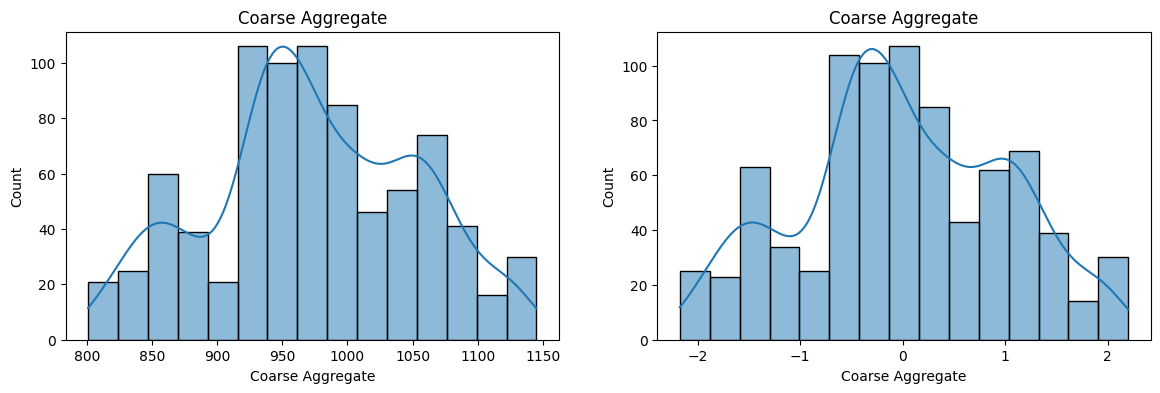

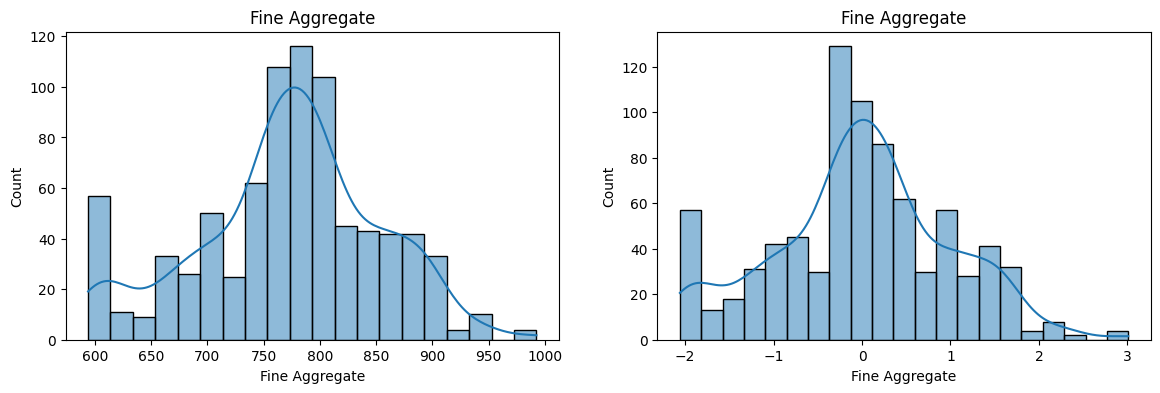

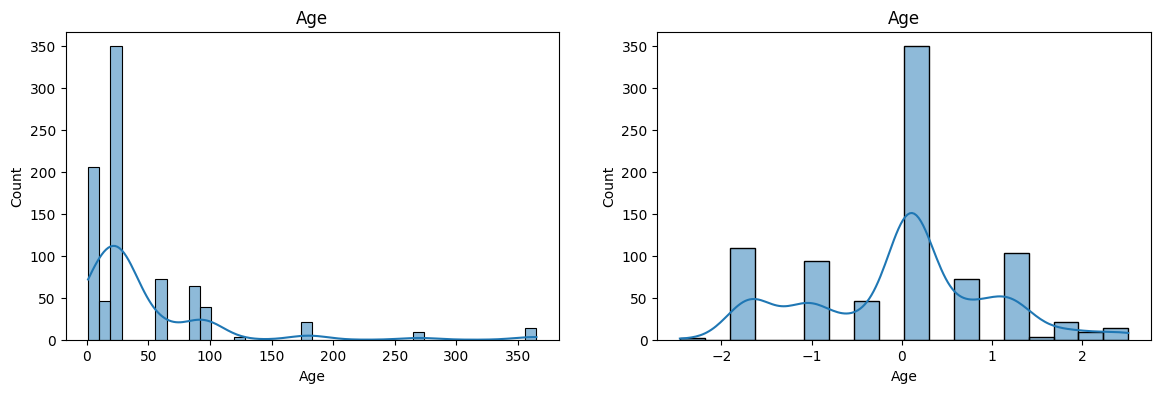

In [14]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col)
    plt.show()

### Yeo Johnson Transformation

In [15]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test, y_pred3))
pd.DataFrame({'cols': X_train.columns, 'yeo-johnson-lambdas': pt1.lambdas_})

0.8161906511066099


,cols,yeo-johnson-lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [16]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_transformed2, y, scoring='r2'))

np.float64(0.6834625126992433)

In [17]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

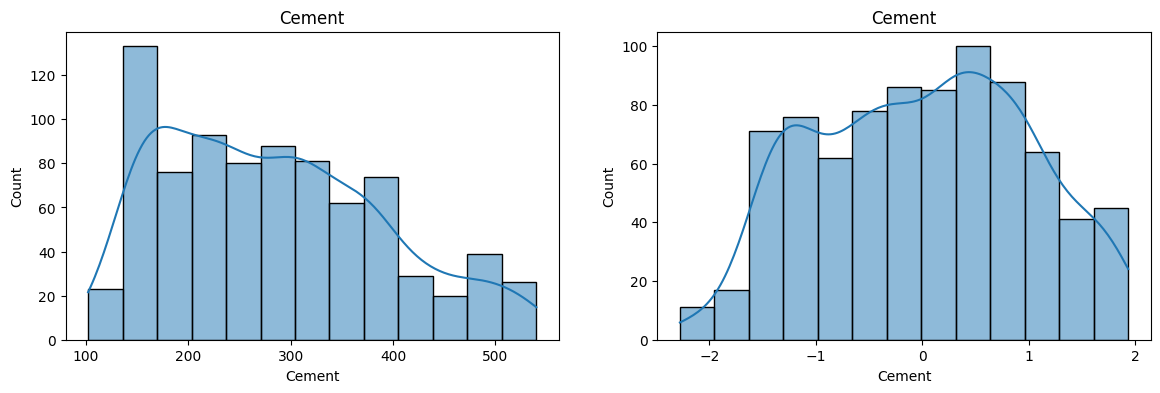

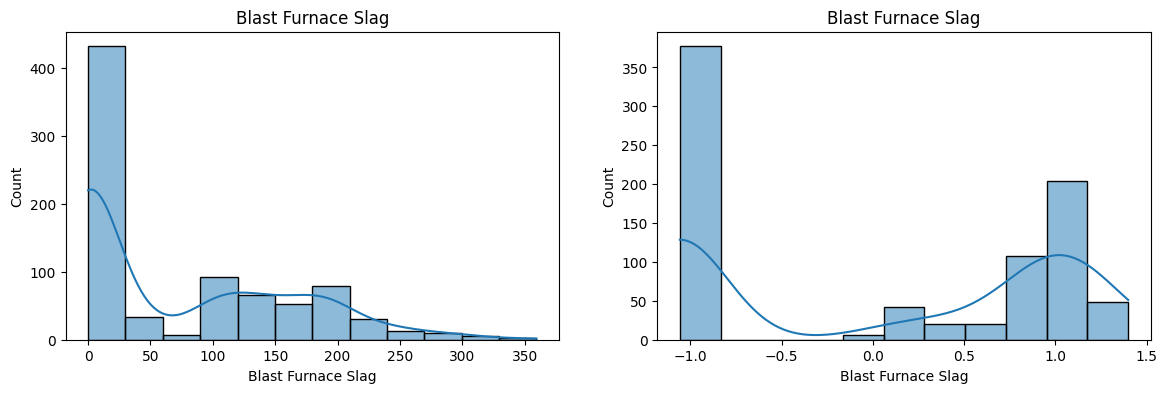

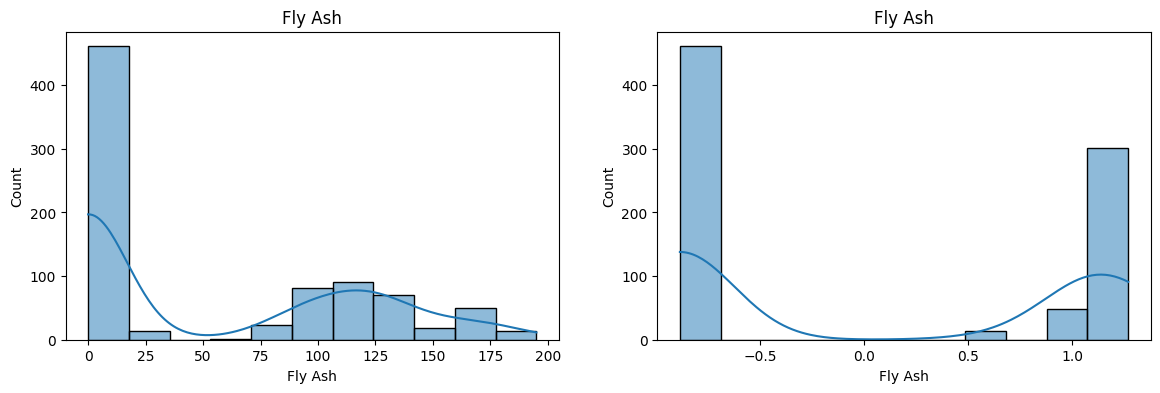

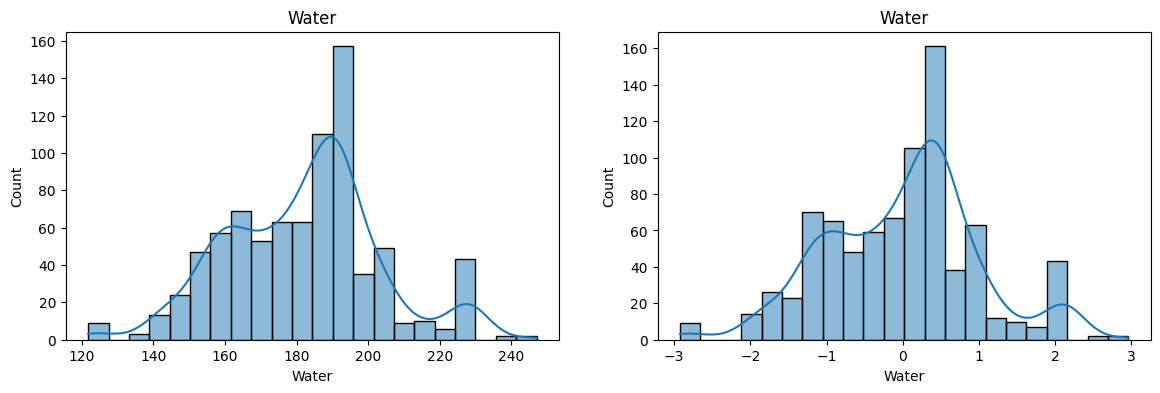

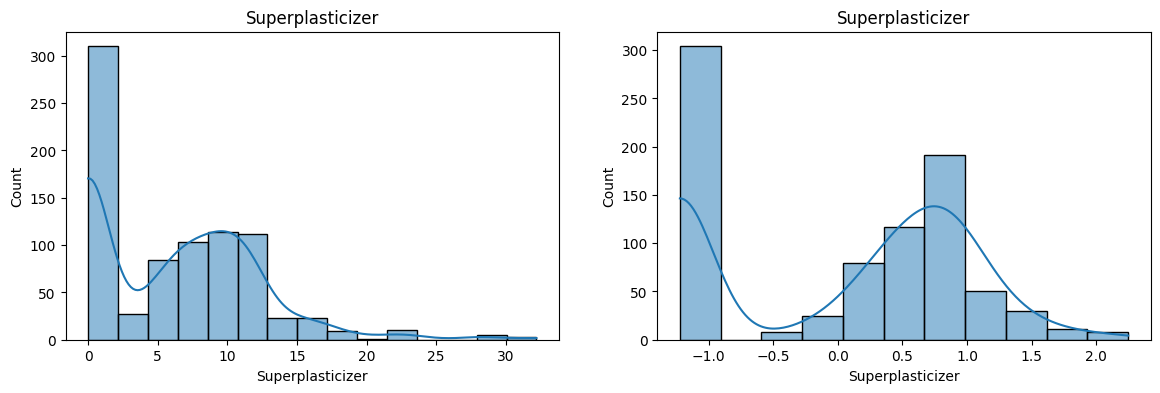

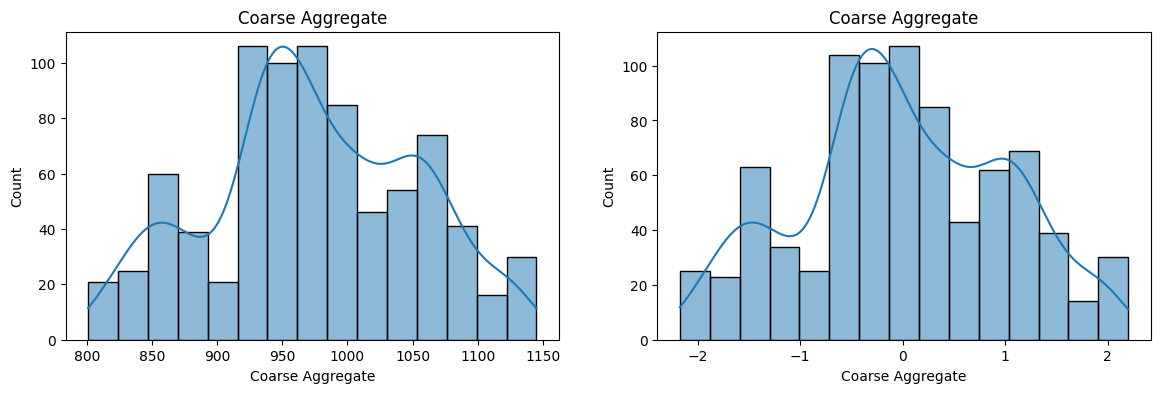

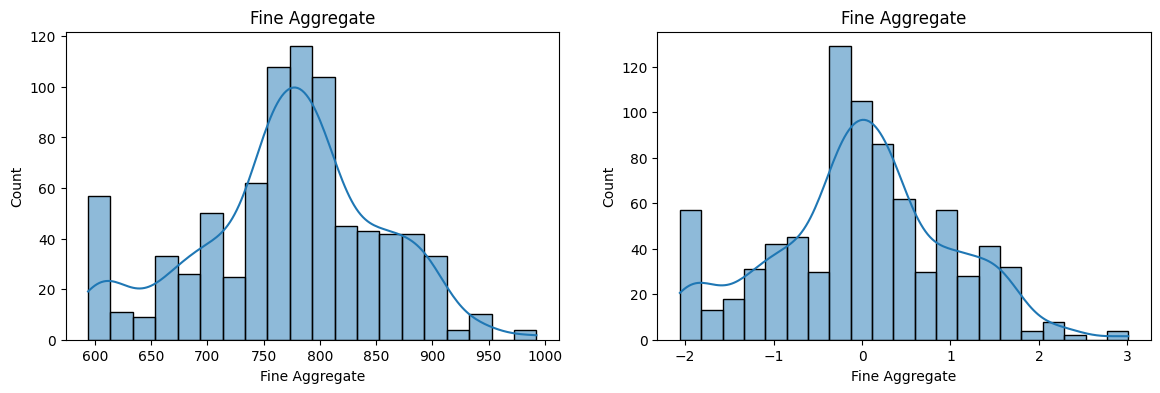

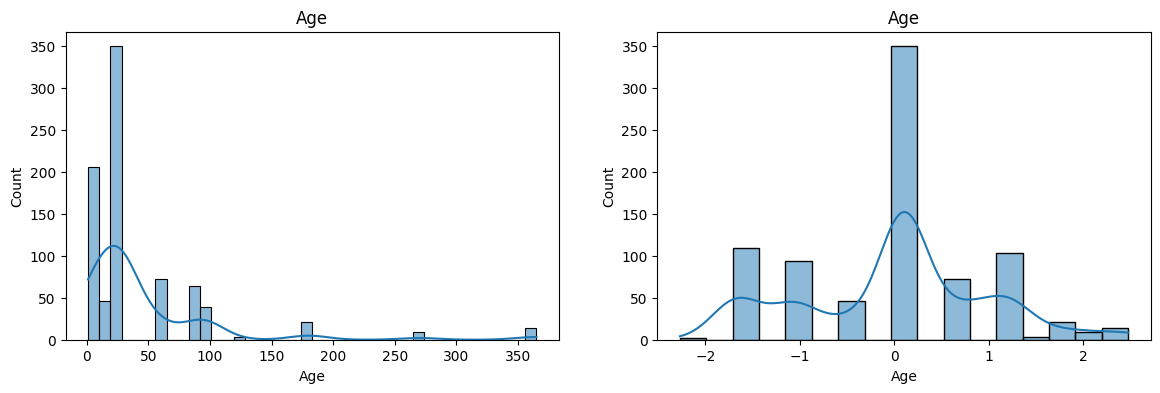

In [18]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(col)
    plt.show()

In [19]:
pd.DataFrame({'cols': X_train.columns, 'box-cox-lambdas': pt.lambdas_, 'yeo-johnson-lambdas': pt1.lambdas_})

,cols,box-cox-lambdas,yeo-johnson-lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
